**Моделювання систем. Лабораторна робота №1**

Мочульський Ростислав, ІПС-32

In [16]:
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def plot_graph(x, y, color=None,x_label=None,y_label=None):
    plt.figure(figsize=(15, 10))

    if color is None:
        plt.plot(x, y)
    else:
        plt.plot(x, y, color=color)
    if x_label is None and y_label is None:
        plt.xlabel('X')
        plt.ylabel('Y')
    plt.style.use({'figure.facecolor':'white'})
    plt.show()

In [18]:
T = 5
y = np.fromfile('f9.txt', sep=' ')
x = np.linspace(0, T, len(y))
N = len(y)

Графік функції з файлу:

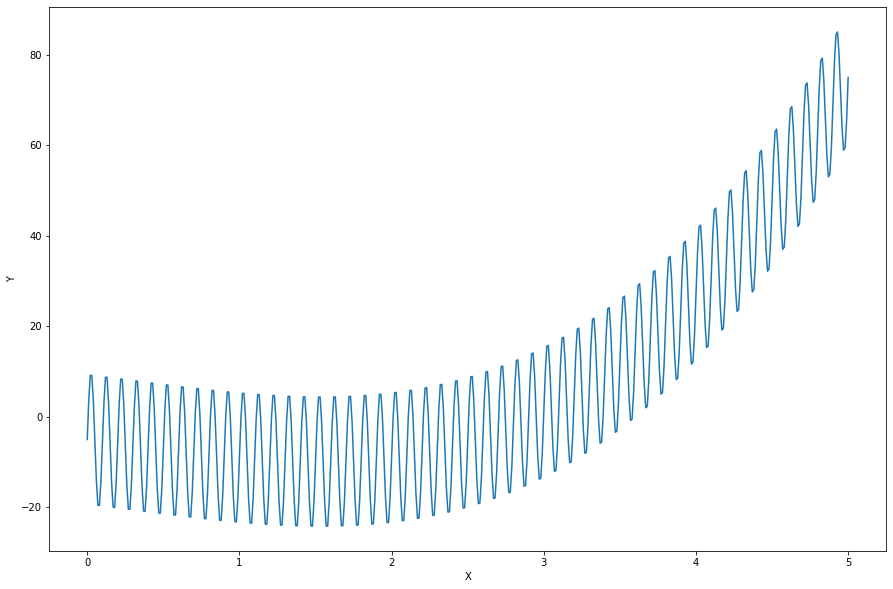

In [19]:
plot_graph(x, y)


Графік модуля перетворення Фур'є:

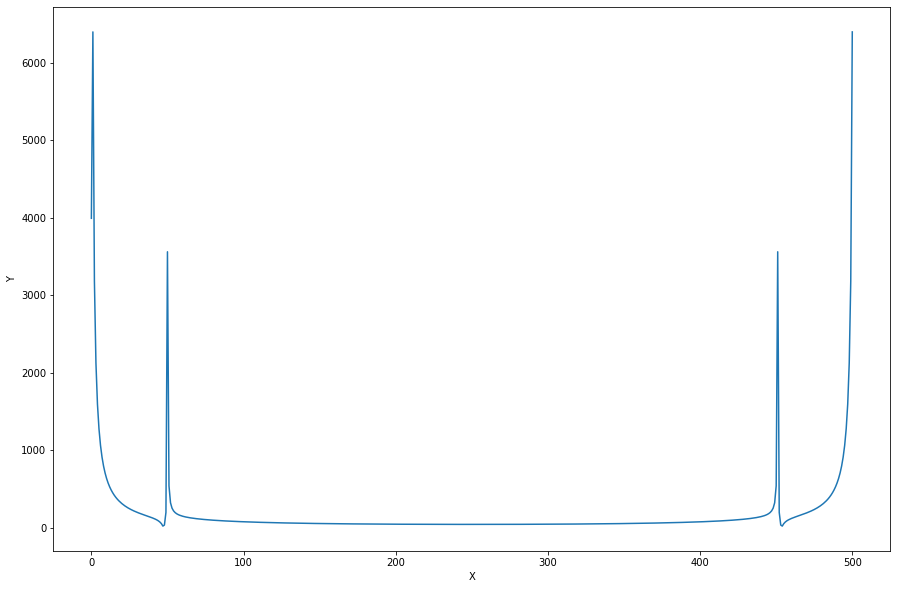

In [20]:
abs_ft = np.abs(np.fft.fft(y))
plot_graph(range(N), abs_ft)

In [21]:
abs_ft_half = abs_ft[0:N // 2]
maximums, = np.where(np.logical_and.reduce(
    np.array([abs_ft_half > np.roll(abs_ft_half, i) for i in
chain(range(-5, 0), range(1, 6))]),
    axis=0
))
maximums = maximums[(maximums >= 5) & (maximums < N // 2 - 5)]
tuple(maximums)

(50,)

In [22]:
f_max = maximums[0] / T
f_max

10.0

In [23]:
def first(x, f):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    minus = 0
    for x_i, f_i in zip(x, f):
        a1 += 2 * pow(x_i, 6)
        a2 += 2 * pow(x_i, 5)
        a3 += 2 * pow(x_i, 4)
        a4 += 2 * pow(x_i, 3)* np.sin(2 * np.pi * f_max * x_i)
        a5 += 2 * pow(x_i, 3)
        minus+= 2 * pow(x_i, 3)* f_i
    return [[a1, a2, a3, a4, a5], minus]

In [24]:
def second(x, f):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    minus = 0
    for x_i, f_i in zip(x, f):
        a1 += 2 * pow(x_i, 5)
        a2 += 2 * pow(x_i, 4)
        a3 += 2 * pow(x_i, 3)
        a4 += 2 * pow(x_i, 2)* np.sin(2 * np.pi * f_max * x_i)
        a5 += 2 * pow(x_i, 2)
        minus+= 2 * pow(x_i, 2) * f_i
    return [[a1, a2, a3, a4, a5], minus]

In [25]:
def third(x, f):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    minus = 0
    for x_i, f_i in zip(x, f):
        a1 += 2 * pow(x_i, 4)
        a2 += 2 * pow(x_i, 3)
        a3 += 2 * pow(x_i, 2)
        a4 += 2 *pow(x_i,1) * np.sin(2 * np.pi * f_max * x_i)
        a5 += 2*pow(x_i,1)
        minus+= 2 * pow(x_i, 1) * f_i
    return [[a1, a2, a3, a4, a5], minus]

In [26]:
def fourth(x, f):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    minus = 0
    for x_i, f_i in zip(x, f):
        a1 += 2*pow(x_i, 3) * np.sin(2 * np.pi * f_max * x_i)
        a2 += 2*pow(x_i, 2) * np.sin(2 * np.pi * f_max * x_i)
        a3+=2*pow(x_i, 1) * np.sin(2 * np.pi * f_max * x_i)
        a4+=2*np.sin(2 * np.pi * f_max * x_i) * np.sin(2 * np.pi * f_max * x_i)
        a5+=2 * np.sin(2 * np.pi * f_max * x_i)
        minus += 2 * np.sin(2 * np.pi * f_max * x_i)*f_i
    return [[a1, a2, a3, a4, a5], minus]

In [27]:
def fifth(x, f):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    minus = 0
    for x_i, f_i in zip(x, f):
        a1 += 2 * pow(x_i, 3)
        a2 += 2 * pow(x_i, 2)
        a3+=2*pow(x_i, 1)
        a4+=2*np.sin(2 * np.pi * f_max * x_i)
        a5+=2
        minus += 2 * f_i
    return [[a1, a2, a3, a4, a5], minus]

In [28]:
A = np.stack((
    first(x,y)[0],
    second(x,y)[0],
    third(x,y)[0],
    fourth(x,y)[0],
    fifth(x,y)[0]),
    axis=1
)

res = [
    first(x,y)[1],
    second(x,y)[1],
    third(x,y)[1],
    fourth(x,y)[1],
    fifth(x,y)[1]
]

In [29]:
answer = np.linalg.inv(A).dot(res)
tuple(answer.round(4))

(1.0, -1.0, -4.0, 15.0, -5.0)

In [30]:
func_approximated = np.vectorize(
 lambda t: answer[0] * t ** 3 + answer[1] * t ** 2 + answer[2] * t + answer[3] * np.sin(2 * np.pi *
f_max * t) + answer[4]
)
y_approximated = func_approximated(x)

Графік апроксимованої функції:

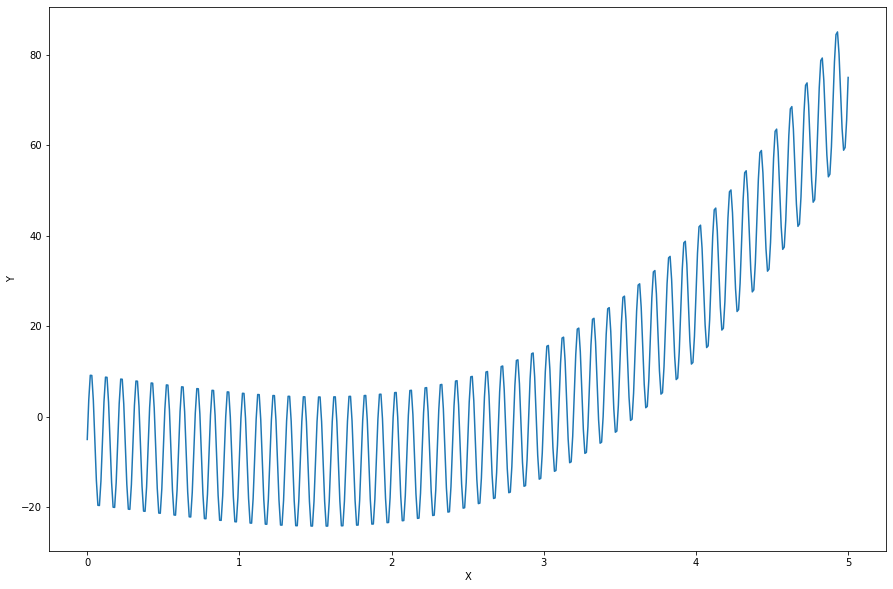

In [31]:
plot_graph(x, y_approximated)



Квадратична похибка отриманої функції:

In [32]:
np.sum((y - y_approximated) ** 2)




3.3563268358498545e-07